# ft_linear_regression

## Import libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('..')
from library.model import model, cost_function, gradient_descent, coeff_determination
import pickle

## Load dataset

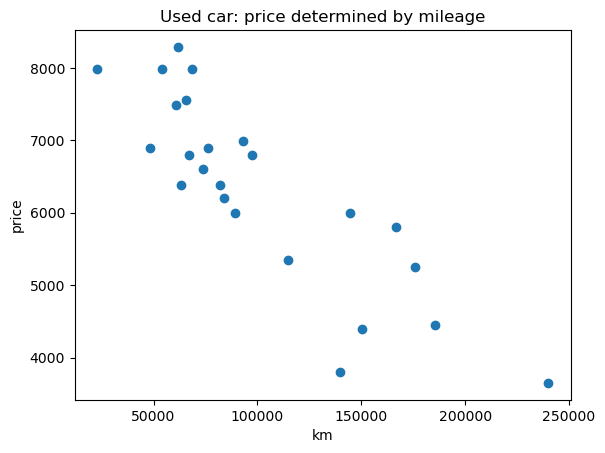

In [15]:
df = pd.read_csv('../data.csv')
df.shape
plt.scatter(df['km'], df['price'])
plt.xlabel('km')
plt.ylabel('price')
plt.title('Used car: price determined by mileage')
plt.show()

- <strong>feature</strong>: km
- <strong>target</strong>: price
- <strong>m</strong>: 24
- <strong>n</strong>: 1

## Prepare data for the model

In [16]:
x = np.array(df['km'], dtype = float)
y = np.array(df['price'], dtype = float)
x_min = np.min(x)
x_range = np.max(x) - x_min
x = (x - x_min) / x_range

In [17]:
y = y.reshape(y.shape[0], 1)
X = x.reshape(x.shape[0], 1)
X = np.hstack((X, np.ones(X.shape)))

In [18]:
theta = np.random.randn(2, 1)

## Train the model

In [19]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate 
                               = 0.5, n_iterations = 1000)

In [20]:
cost_function(X, y, theta_final)

222822.6225356367

In [21]:
predictions = model(X, theta_final)

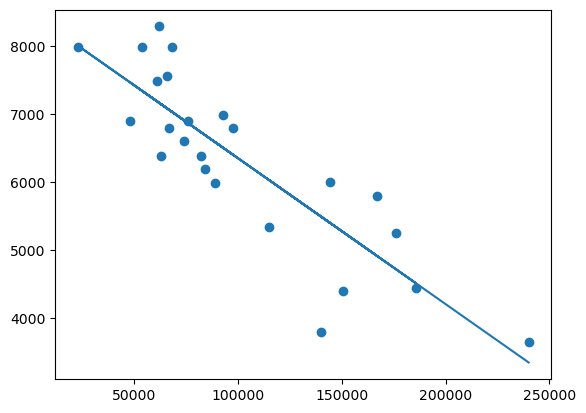

In [22]:
plt.scatter(df['km'], df['price'])
plt.plot(df['km'], predictions)
plt.show()

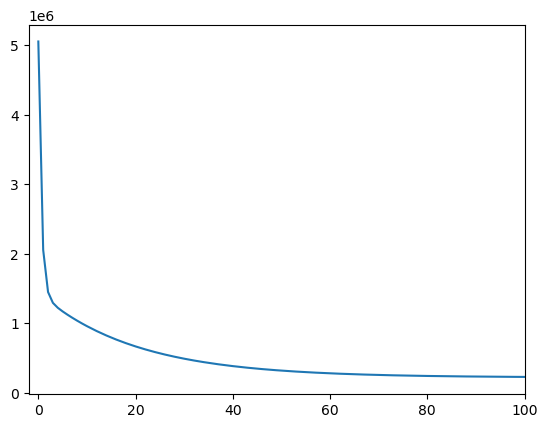

In [29]:
plt.plot(range(1000), cost_history)
plt.xlim(-2, 100)
plt.show()

In [24]:
coeff_determination(y, predictions)

0.7329747078314965

## Save data as a pickle

In [25]:
output_file = 'trained_model.pkl'
model_results = {
	'theta': theta_final,
    'x_min': x_min,
    'x_range': x_range
}

with open(output_file, 'wb') as f:
    pickle.dump(model_results, f)